Read the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'heart.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The dataset appears to contain various features related to heart health, including age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiogram results, maximum heart rate, exercise-induced angina, ST depression (Oldpeak), the slope of the peak exercise ST segment (ST_Slope), and a target variable indicating the presence of heart disease.

For anomaly detection, we can consider the numerical features and ignore the categorical ones for simplicity. We'll use a common anomaly detection algorithm from PyOD, such as Isolation Forest, which is effective for detecting outliers in high-dimensional datasets.

In [5]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=3a394945da63d76a593641647289bcc9f9e7d010008448ecccc0a34a73eaee6a
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [10]:
import numpy as np  # Re-importing NumPy
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
import numpy as np
from sklearn.ensemble import IsolationForest

# Selecting numerical features
numerical_data = data.select_dtypes(include=[np.number])

# Normalizing the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying Isolation Forest for anomaly detection
iforest = IForest(contamination=0.01)  # assuming 1% of the data as outliers
iforest.fit(scaled_data)

# Predicting outliers
outliers = iforest.predict(scaled_data)
outlier_data = numerical_data[outliers == 1]

outlier_data.head(), outlier_data.shape[0]  # Displaying first few outliers and total number of outliers detected



(     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
 294   32         95            0          1    127      0.7             1
 322   38        105            0          1    166      2.8             1
 399   61        200            0          1     70      0.0             1
 491   75        170          203          1    108      0.0             1
 496   58        132          458          1     69      1.0             0,
 10)

Scatter Plots: To visualize the relationship between pairs of features and highlight the outliers.

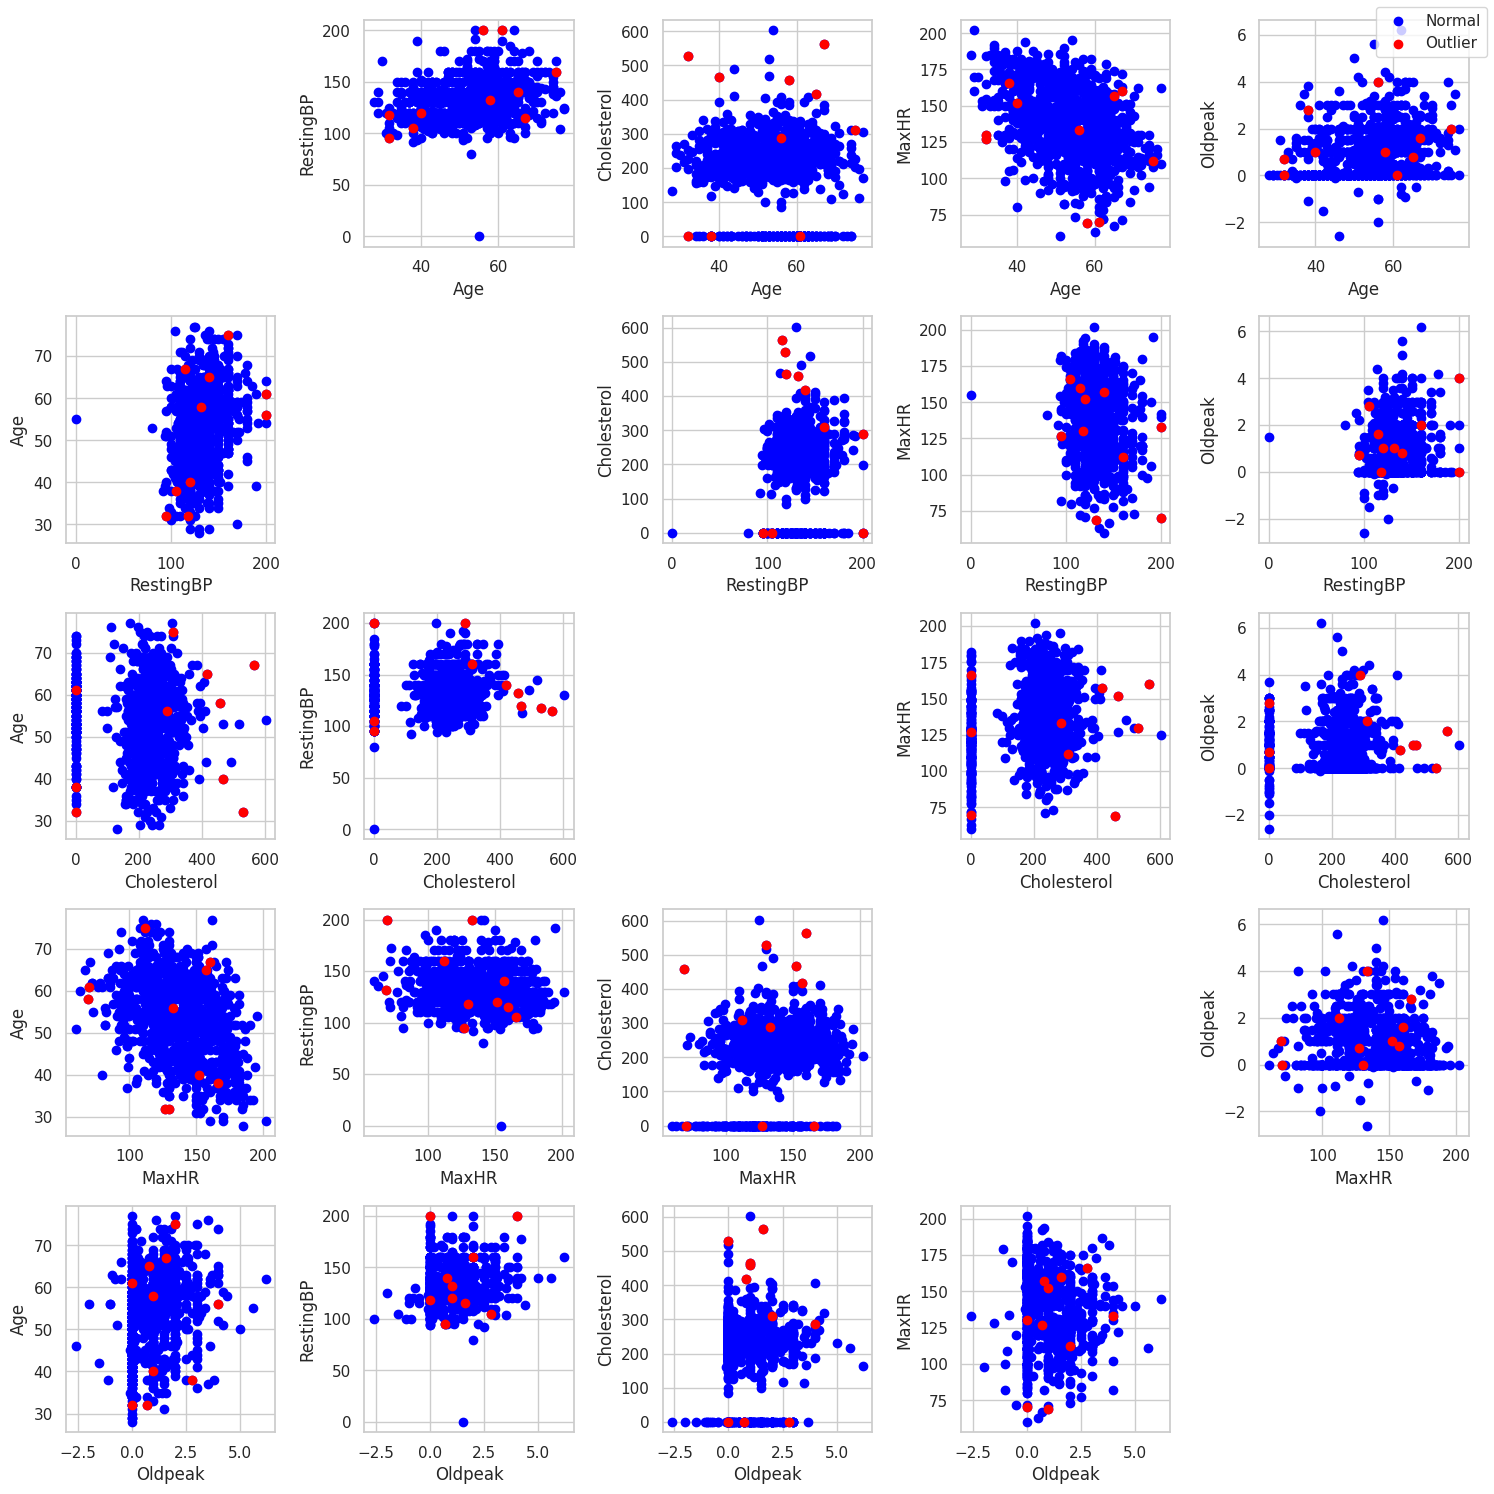

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")

# Creating scatter plots for a couple of pairs of features
features_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_plots = len(features_to_plot)
fig, axs = plt.subplots(num_plots, num_plots, figsize=(15, 15))

for i in range(num_plots):
    for j in range(num_plots):
        if i != j:
            axs[i, j].scatter(numerical_data[features_to_plot[i]], numerical_data[features_to_plot[j]], c='blue', label='Normal')
            axs[i, j].scatter(outlier_data[features_to_plot[i]], outlier_data[features_to_plot[j]], c='red', label='Outlier')
            axs[i, j].set_xlabel(features_to_plot[i])
            axs[i, j].set_ylabel(features_to_plot[j])
        else:
            axs[i, j].set_visible(False)

# Adding a legend
handles, labels = axs[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


The scatter plots above illustrate the relationship between different pairs of features, with outliers marked in red and normal data points in blue. These visualizations help in identifying how outliers differ from the typical data points in various feature combinations.

For example:

* In the plot comparing "Age" and "RestingBP", you can see outliers are not specifically clustered in a particular age or blood pressure range, indicating their anomalous nature isn't solely based on these two features.
* In the "Cholesterol" related plots, the outliers often appear at the lower end, suggesting that extremely low cholesterol values are a common anomaly characteristic in this dataset.

Box plots for each of these features to visualize the distribution and spot the outliers more distinctly.

Box plots will show the median, quartiles, and outliers as individual points outside the interquartile range.

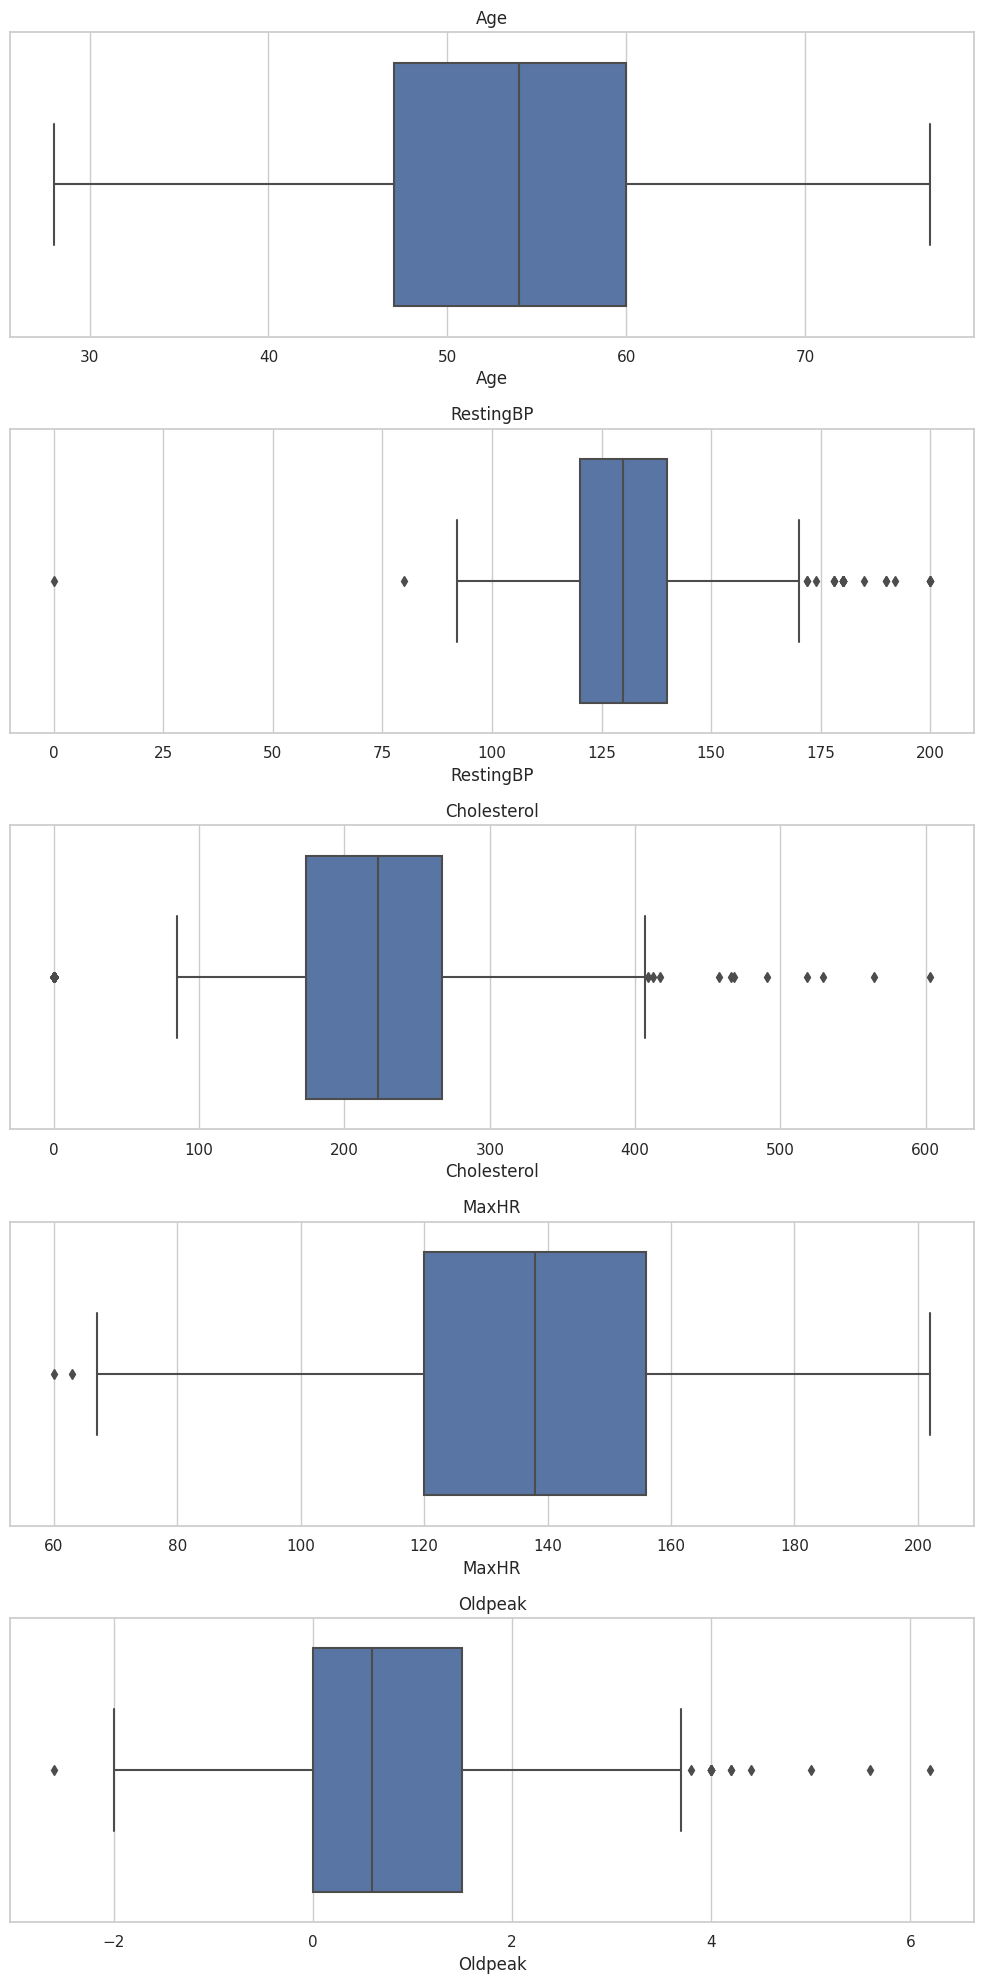

In [9]:
# Creating box plots for the selected features
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 20))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=numerical_data[feature], ax=axs[i])
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()


#The box plots provide a clear visualization of the distribution of each selected feature:

* Age: The distribution appears relatively normal with no significant outliers.
* RestingBP: There are a few outliers on the lower and higher end of resting blood pressure values.
* Cholesterol: This feature shows several outliers, particularly at the lower end, indicating instances of extremely low cholesterol levels.
* MaxHR (Maximum Heart Rate): There are outliers on both the lower and higher ends of the maximum heart rate spectrum.
* Oldpeak (ST Depression): This feature also presents outliers, notably some with negative values, which could be unusual in this context.